# Image Features Extraction


Detecting shapes (mainly lines, edges, circles and polygons) in images using Hough Transform technique in Python using OpenCV library.

The Hough Transform is a popular feature extraction technique to detect any shape within an image. It is mainly used in image analysis, computer vision and image recognition.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

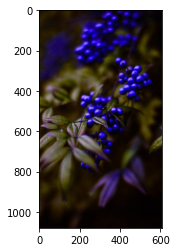

In [2]:
# read the image
image = cv2.imread("farm_img.jpeg")
# show the image, making sure it has successfully read.
plt.imshow(image)

### We need to convert this image to gray scale for perfect edge detection:
Gray scale image has only two colors, that's black and while and since we don't need the color, hence we focus on the BW

Edge detection is an image processing technique for finding the boundaries of objects within images. It mainly works by detecting discontinuities in brightness. One of the most popular and widely used algorithm is Canny edge detector.

Canny edge detector is an edge detection operator that uses multi-stage algorithm to detect a wide range of edges in images.

The main stages are:

    Filtering out noise using Gaussian blur algorithm.
    Finding the strength and direction of edges using Sobel Filters.
    Isolating the strongest edges and thin them to one-pixel wide lines by applying non-maximum suppression.
    Using hysteresis to isolate the best edges.


In [3]:
# convert the image to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


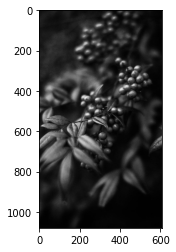

In [4]:
# show the grayscale image
plt.imshow(grayscale, cmap="gray")
plt.show()

## Edges detection


All we need to do now, is to pass this image to cv2.Canny() function which finds edges in the input image and marks them in the output map edges using the Canny algorithm:

- The smallest value between threshold1 and threshold2 is used for edge linking. 
- The largest value is used to find initial segments of strong edges.




In [5]:
# perform the canny edge detector to detect image edges
edges = cv2.Canny(grayscale, threshold1=30, threshold2=100)


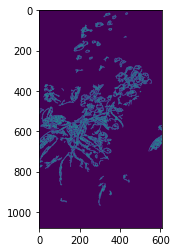

In [6]:
plt.imshow(edges)

### Saving the result to the project dir

In [7]:
import cv2
import numpy as np

FILE_NAME = 'farm_img.jpeg'
try:
	# Read image from disk.
	img = cv2.imread(FILE_NAME)

	# Canny edge detection.
	edges = cv2.Canny(img, 30, 100)

	# Write image back to disk.
	cv2.imwrite('result.jpg', edges)
except IOError:
	print ('Error while reading files !!!')


## Performing live image edge detection

If you want to use the live camera, detect live image edges:

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 30, 100)
    cv2.imshow("edges", edges)
    cv2.imshow("gray", gray)
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


## Detecting Lines using | StandardHoughLines and Canny Edge function.
1. The Hough Line Transform is a transform used to detect straight lines.
2. To apply the Transform, first an edge detection pre-processing is desirable.

##### What does this program do?
- Loads an image
- Applies a Standard Hough Line Transform and a Probabilistic Line Transform.
- Display the original image and the detected line in three windows.


##### with the following arguments:
- dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
- lines: A vector that will store the parameters (r, θ) of the detected lines
- rho : The resolution of the parameter r in pixels. We use 1 pixel.
- theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
- threshold: The minimum number of intersections to "*detect*" a line
- srn and stn: Default parameters to zero. Check OpenCV reference for more info.

In [ ]:
import cv2
import numpy as np


#Reading the image
default_file = 'shapes.png'
img = cv2.imread('farm_img.jpeg')

#Checking if image is loaded fine
if img is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n') 


# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

cv2.imshow("edges", edges)
cv2.waitKey(0)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('Hough Lines', image)
cap.release()
cv2.destroyAllWindows()

In [ ]:
# show the image using the matplotlib
plt.imshow(image)
plt.show()

## Detection of lines and edges of image from live camera

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

cap = cv2.VideoCapture(0)

while True:
    _, image = cap.read()
    # convert to grayscale
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # perform edge detection
    edges = cv2.Canny(grayscale, 30, 100)
    # detect lines in the image using hough lines technique
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 5)
    # iterate over the output lines and draw them
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)
            cv2.line(edges, (x1, y1), (x2, y2), (255, 0, 0), 3)
    # show images
    cv2.imshow("image", image)
    cv2.imshow("edges", edges)
    if cv2.waitKey(5) == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

### Circle Detection - Using the HoughCircle and HoughGradient

**cv2.HoughCircles**(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)


    with the arguments:
    gray: Input image (grayscale).
    circles: A vector that stores sets of 3 values: x c , y c , r for each detected circle.
    HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV.
    dp = 1: The inverse ratio of resolution.
    min_dist = gray.rows/16: Minimum distance between detected centers.
    param_1 = 200: Upper threshold for the internal Canny edge detector.
    param_2 = 100*: Threshold for center detection.
    min_radius = 0: Minimum radius to be detected. If unknown, put zero as default.
    max_radius = 0: Maximum radius to be detected. If unknown, put zero as default.
    
The Hough gradient method, which is made up of two main stages:
 - The first stage involves edge detection and finding the possible circle centers and 
 - the second stage finds the best radius for each candidate center.
 
What does this program do?
- Loads an image and blur it to reduce the noise
- Applies the Hough Circle Transform to the blurred image .
- Display the detected circle in a window.

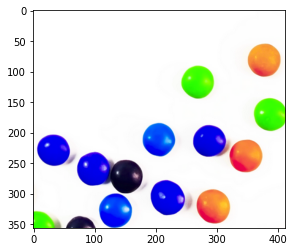

In [24]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Reading the image
default_file = 'farm_img.jpeg'

img = cv2.imread('smarties.png')

#Checking if image is loaded fine
if img is None:
    print('Error opening image, try and fix it!')
    print('Check your working directory if image exist')
    print('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n') 
plt.imshow(img)

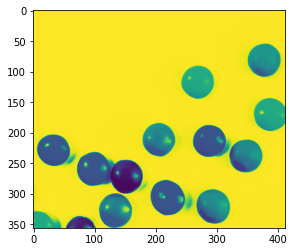

In [36]:
  # Convert it to gray
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(grayImg)

Apply a Median blur to reduce noise and avoid false circle detection:

In [37]:
# Reduce the noise to avoid false circle detection
    gray = cv2.medianBlur(grayImg, 5)

Proceed to apply Hough Circle Transform:

In [40]:
 rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)

Let's Draw the detected circles in the image:
- You can see that we will draw the circle(s) on red and the center(s) with a small green dot

In [ ]:
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, (255, 0, 255), 3)
            co = i+1
            # print the number of circles detected
            print("Number of circles detected:", co)

            # save the image, convert to BGR to save with proper colors
            cv2.imwrite("coins_circles_detected.png", cimg)

Display the detected circle(s) and wait for the user to exit the program:

In [ ]:
cv2.imshow("detected circles", img)
cv2.waitKey(0)

## Polygons Detection

### Geometric shape Detection | triangle, circle, rectangle, star and polygons

In [ ]:
import numpy as np
import cv2

# Load and then gray scale image

image = cv2.imread('farm_img.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Identifying Shapes',image)
cv2.waitKey(0)

ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)
        
        # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 125 ,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
        else:
            shape_name = "Rectangle"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
        
        
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)

    cv2.imshow('Identifying Shapes',image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()